In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
import random ,string

img= cv2.imread('img/5.jpg')
#print(img.shape)

def show_image(val):
    for i,s in enumerate(val):
        cv2.imshow('Hello World'+ str(i),s)    
    cv2.waitKey()
    cv2.destroyAllWindows()

In [ ]:
#gray color

gr=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

show_image([gr])


gr.shape


In [ ]:
h, w = img.shape[:2]

print(h,w)

trns= np.float32([[1,0,w/4],[0,1,h/4]])

rt= cv2.getRotationMatrix2D((w/2,h/2),22,1)

#img_t= cv2.transpose(img)

img_t=cv2.warpAffine(img,rt,(w,h))

show_image(img_t)

In [ ]:
#resizing INTER_LANCZOS4, cubic is best one
#https://stackoverflow.com/questions/3112364/how-do-i-choose-an-image-interpolation-method-emgu-opencv
img= cv2.imread('img/1.jpg')
i1=cv2.resize(img,(700,700), interpolation = cv2.INTER_LINEAR  )
i2=cv2.resize(img,(500,500), interpolation = cv2.INTER_LANCZOS4 )
i3=cv2.pyrDown(cv2.pyrDown(cv2.pyrDown(img)))
show_image([i1,i2,i3])

In [ ]:
#cropping
img1=cv2.rectangle(img, (55,55),(500,500),255)

cropped= img[200:843, 222:1000]

show_image([cropped,img1])

In [ ]:
#blurring
img= cv2.imread('img/5.jpg')
img=cv2.resize(img,(500,500), interpolation = cv2.INTER_LANCZOS4 )

#manual
kernal= np.ones((3,3),np.float32)*1/2
blur= cv2.filter2D(img, -1,kernal)

#auto

b1= cv2.blur(img,(2,2))
b2= cv2.GaussianBlur(img,(3,3),0)
b3= cv2.bilateralFilter(img,9,75,75)
b4= cv2.fastNlMeansDenoisingColored(img,None,6,6,7,21)
show_image([img,b3])

In [ ]:
#image sharpening

kernal = np.array([
    [-1,-1,-1],
    [-1,9,-1],
    [-1,-1,-1]
])

sh= cv2.filter2D(img, -1, kernal)

show_image([img, sh])

In [ ]:
#threashholding  **

img= cv2.imread('img/1.jpg')
img=cv2.resize(img,(800,800), interpolation = cv2.INTER_LANCZOS4 )

#img= cv2.bilateralFilter(img,9,75,75)
img= cv2.GaussianBlur(img,(3,3),0)

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#ret,thrd= cv2.threshold(gray_img, 150, 255,cv2.THRESH_TOZERO)
#thrd= cv2.adaptiveThreshold(gray_img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,5)
ret,thrd= cv2.threshold(gray_img, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

show_image([gray_img,thrd])
#gray_img

In [ ]:
#dialtion and erosion 

kernal = np.ones((5,5),np.uint8)

#erosion
er= cv2.erode(img,kernal,iterations =1)
#dial
di= cv2.dilate(img,kernal,iterations =1)

#morpho

opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernal)
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernal)

show_image([img,opening,closing])

In [ ]:
#edge detection
img= cv2.imread('img/nk.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(400,500), interpolation = cv2.INTER_LANCZOS4 )


img1= cv2.Canny(img, 100,200)

show_image([img,img1])

#cv2.getPerspectiveTransform

In [ ]:
# finding contours
img= cv2.imread('img/4.jpg')
img=cv2.resize(img,(500,400), interpolation = cv2.INTER_LANCZOS4 )
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#blur
gray= cv2.GaussianBlur(gray,(3,3),0)
#ret,gray= cv2.threshold(gray, 50, 255,cv2.THRESH_TOZERO)

#show_image([gray,img])

gray= cv2.Canny(gray, 100,200)
cnts, hr = cv2.findContours(gray.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


def get_cont_areas(cntrs):
    areas=[]
    for c in cntrs:
        areas.append(cv2.contourArea(c))
    return areas


#actual image cont draw
img1=img.copy()
cv2.drawContours(img1 , cnts,-1,(0,255,0),3)

#blank image cotours draw
blank_img= np.zeros((gray.shape[0],gray.shape[1],3))  
blank_img1= blank_img.copy()
cv2.drawContours(blank_img1 , cnts,-1,(0,255,0),3)


#show max cot.
max_cons = sorted(cnts,key=cv2.contourArea,reverse=True)[:]
img2=img.copy()
cv2.drawContours(img2 , max_cons,-1,(0,255,0),3)
print(get_cont_areas(max_cons[:10]))

show_image([blank_img1,img2])



#finding top contours and convexhull 
def showContoursInSeries():
    for cnt in max_cons[:2]:
        hull= cv2.convexHull(cnt)
        approx=cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt, True),True)
        print(len(approx)) #no of polygons
        img3=img.copy()
        cv2.drawContours(img3 ,[hull],-1,(0,255,0),3)
        show_image([img3])
        
showContoursInSeries()




In [ ]:
#blob detections
import cv2

#skin detection option possible but not good
img= cv2.imread('img/Sunflowers.jpg',cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img,(500,600), interpolation = cv2.INTER_LANCZOS4 )


params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 20000
params.filterByArea = True
detector=cv2.SimpleBlobDetector_create(params)



keypoints=detector.detect(img)

#draw detect blobs
blank = np.zeros((2,2))
blobs=cv2.drawKeypoints(img,keypoints,blank,(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


show_image([img,blobs])

In [ ]:
#image features detection ##pogo cam
#use best preformer sift and surf
#https://github.com/anaustinbeing/haar-cascade-files
import cv2

img= cv2.imread('img/1.jpg',cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img,(600,600), interpolation = cv2.INTER_LANCZOS4 )

orb= cv2.ORB_create(500,1.5)
keypoints,desc=orb.detectAndCompute(img, None)

img1= cv2.drawKeypoints(img,keypoints,outImage=None,color=(255,0,255))

show_image([img1])

In [ ]:
#face recognization 
#install dlib -https://medium.com/analytics-vidhya/how-to-install-dlib-library-for-python-in-windows-10-57348ba1117f#:~:text=Now%20we%20can%20install%20dlib,need%20to%20install%20CMake%20library.&text=Then%2C%20you%20can%20install%20dlib%20library%20using%20pip%20install%20.&text=After%20passing%20enter%2C%20you%20laptop,run%20the%20C%2C%20C%2B%2B%20Compiler.
#Localize the tips of your fingers
#help doc https://www.pyimagesearch.com/2019/12/16/training-a-custom-dlib-shape-predictor/
import cv2
import dlib
import numpy 
from collections import OrderedDict
from imutils import face_utils

FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 35)),
    ("jaw", (0, 17))
])

PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()


#shapes = numpy.matrix([[p.x, p.y] for p in predictor(image, rect[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, pos in enumerate(landmarks):
        pos=tuple(pos)
        cv2.putText(im, str(idx),pos ,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im


cap = cv2.VideoCapture(0)
while True:
    
    ret, frame = cap.read()   
    #image=cv2.resize(frame,(700,700), interpolation = cv2.INTER_LANCZOS4 )
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    rects = detector(gray,1)
    
    if(len(rects) == 0):
        print("no face..")
        continue
    
    shape = predictor(gray, rects[0])
    landmarks = face_utils.shape_to_np(shape)
    #print(landmarks)
    image_with_landmarks = annotate_landmarks(frame, landmarks)
    #show face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rects[0])
    cv2.rectangle(image_with_landmarks, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow('Live', image_with_landmarks )
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows() 

#output = face_utils.visualize_facial_landmarks(image, shapes)

           

In [ ]:
import cv2

#skin detection option possible but not good
img= cv2.imread('img/3.jpg')
crop_img1=cv2.resize(img,(500,600), interpolation = cv2.INTER_LANCZOS4 )


crop_img = cv2.fastNlMeansDenoisingColored(crop_img1, None, 4, 4, 7, 21)
crop_img = cv2.Canny(crop_img1, 90, 100)

show_image([crop_img1,crop_img])

In [ ]:
#show coutours live video 

cap = cv2.VideoCapture(0)
while True:
    
    ret, frame = cap.read()   
    #resize down
    #frame = cv2.pyrDown(frame, cv2.IMREAD_UNCHANGED)

    
    #image=cv2.resize(frame,(700,700), interpolation = cv2.INTER_LANCZOS4 )
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    #denoised = cv2.fastNlMeansDenoisingColored(frame, None, 4, 4, 7, 7)
    
    can_img = cv2.Canny(denoised, 90, 100)
    
    ret,thresh = cv2.threshold(gray, 180, 255, 0)  #not much useful
    
    blank_img = np.zeros((frame.shape[1], frame.shape[0]), dtype=np.uint8)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #con_img = cv2.drawContours(frame, contours, -1, (0,255,0), 2)
    img = frame.copy()
    
    for c in contours:
        # find bounding box coordinates
        x,y,w,h = cv2.boundingRect(c)
        #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
              
        # find minimum area
        rect = cv2.minAreaRect(c)
        # calculate coordinates of the minimum area rectangle
        box = cv2.boxPoints(rect)
        # normalize coordinates to integers
        box = np.int0(box)
        # draw contours
        cv2.drawContours(img, [box], 0, (0,0, 255), 3)
        # calculate center and radius of minimum enclosing circle
        (x,y),radius = cv2.minEnclosingCircle(c)
        # cast to integers
        
        center = (int(x),int(y))
        radius = int(radius)
        # draw the circle
        img = cv2.circle(img,center,radius,(0,255,0),2)

        cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
       
    cv2.imshow('Live', img )   
    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

In [66]:
#crop text from content

import cv2

#skin detection option possible but not good
img= cv2.imread('img/1.jpg')
img=cv2.resize(img,(800,800), interpolation = cv2.INTER_LANCZOS4 )

x,y,w,h =  10,10,100,109

#crop_img = cv2.fastNlMeansDenoisingColored(crop_img1, None, 4, 4, 7, 21)
#crop_img = cv2.Canny(crop_img1, 90, 100)


#cv2.waitKey()      
#cap.release()

## draw rectangular
first_done=False
mouseX,mouseY=0,0
def draw_rect(event,x,y,flags,param):  
    global mouseX,mouseY,first_done
    if event == cv2.EVENT_LBUTTONUP:
        if(not first_done):
            mouseX,mouseY = x,y
            first_done=True
        else :
            cv2.rectangle(img, (mouseX,mouseY), (x, y), (0, 255, 0), 2)
            first_done= False
            print("rectange -",mouseX,mouseY,x,y)
        

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rect)
while(1):
    cv2.imshow('image', img)   
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        cv2.destroyAllWindows()
        break
      
    
#rec 800,800 --  365 426 410 435

rectange - 358 457 395 464


1 4000 3000


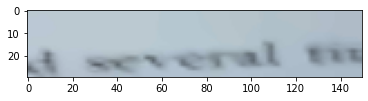

In [98]:
import cv2
import matplotlib.pyplot as plt


img= cv2.imread('img/1.jpg')
orgH,orgW= img.shape[:2]
aspect_ratio=orgH//orgW
new_w=800
img=cv2.resize(img,(new_w,new_w*aspect_ratio), interpolation = cv2.INTER_LANCZOS4 )
print(aspect_ratio,orgH,orgW)
x1,y1,x2,y2 =  358, 457, 395, 456

#cv2.rectangle(img, (x1,y1), (x2, y2), (0, 255, 0), 2)
offset=10
crop_img = img[y1-offset:y2+offset, x1-offset:x2+offset]
crop_img =cv2.resize(crop_img, (150,30))
crop_img = cv2.fastNlMeansDenoisingColored(crop_img, None, 4, 4, 7, 21)
#crop_img = cv2.Canny(crop_img, 90, 100)
#show_image([crop_img])
cv2.imwrite('img/tobetexted 3.jpg',crop_img)
plt.imshow(crop_img)

In [63]:
import cv2 
import pytesseract

#preprocess  https://nanonets.com/blog/ocr-with-tesseract/
cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
cv2.medianBlur(crop_img,5)
#cv2.threshold(crop_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

pytesseract.pytesseract.tesseract_cmd = 'C://Program Files//Tesseract-OCR//tesseract.exe'
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(crop_img, config=custom_config)

'Dewimat:'

In [17]:
import cv2
import pytesseract
img = crop_img #cv2.imread('image.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

In [18]:
import cv2
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = 'C://Program Files//Tesseract-OCR//tesseract.exe'

img = cv2.imread('img/8.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [20]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

In [38]:
import cv2
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = 'C://Program Files//Tesseract-OCR//tesseract.exe'

img = cv2.imread('img/8.jpg')

x1,y1,x2,y2 =  300 ,350 ,400, 400
offset=10
img = img[y1-offset:y2+offset, x1-offset:x2+offset]
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(origH, origW) = img.shape[:2]


img =cv2.resize(img, (600,400))

#img=cv2.medianBlur(img,5)
can_img = cv2.Canny(img, 90, 100)
#can_img=cv2.threshold(can_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

configuration = ("-l eng --oem 1 --psm 8")
d = pytesseract.image_to_data(can_img, output_type=Output.DICT,config=configuration)
print(d['text'])

cv2.imshow('i',can_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#https://nanonets.com/blog/deep-learning-ocr/

['', '', '', '', 'ao']


In [39]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()